# Social Security EDA

> **Notebook Author:** Elliott Serna

## Beneficiary-Worker Counts 

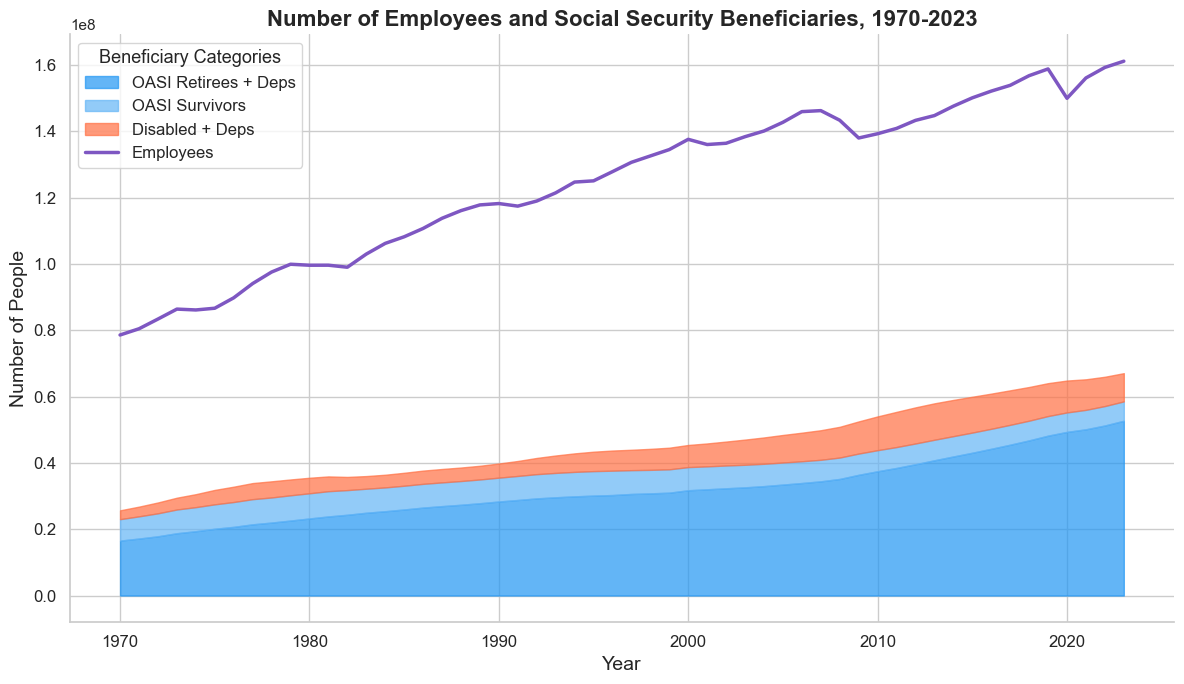

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/elliottserna/Desktop/CDJ/Social_Security/workspace/Elliott/data/beneficiaries_workers.xlsx'
sheet_name = 'Analysis'

# Read the data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rescale the 'EMPLOYEES' column (values are in thousands)
df['EMPLOYEES'] = df['EMPLOYEES'] * 1000

# Calculate cumulative sums for stacked areas
df['RETIREES_DEPS_CUM'] = df['OASI RETIREES + DEPS']
df['SURVIVORS_CUM'] = df['RETIREES_DEPS_CUM'] + df['OASI SURVIVORS']
df['DISABLED_DEPS_CUM'] = df['SURVIVORS_CUM'] + df['DISABLED + DEPS']

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Define colors for the categories
oasi_color = '#64b5f6'  # Light blue for OASI categories
oasi_dark_color = '#2196f3'  # Darker blue for OASI retirees
disability_color = '#ff7043'  # Coral for disabled category
employees_color = '#7e57c2'  # Purple for employees line

# Plot the stacked areas with cohesive colors
plt.fill_between(df['YEAR'], 0, df['RETIREES_DEPS_CUM'], label='OASI Retirees + Deps', color=oasi_dark_color, alpha=0.7)
plt.fill_between(df['YEAR'], df['RETIREES_DEPS_CUM'], df['SURVIVORS_CUM'], label='OASI Survivors', color=oasi_color, alpha=0.7)
plt.fill_between(df['YEAR'], df['SURVIVORS_CUM'], df['DISABLED_DEPS_CUM'], label='Disabled + Deps', color=disability_color, alpha=0.7)

# Overlay the line plot for employees
sns.lineplot(x='YEAR', y='EMPLOYEES', data=df, color=employees_color, label='Employees', linewidth=2.5)

# Add titles and labels with enhanced font sizes
plt.title('Number of Employees and Social Security Beneficiaries, 1970-2023', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with better spacing
plt.legend(title='Beneficiary Categories', loc='upper left', fontsize=12, title_fontsize='13')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


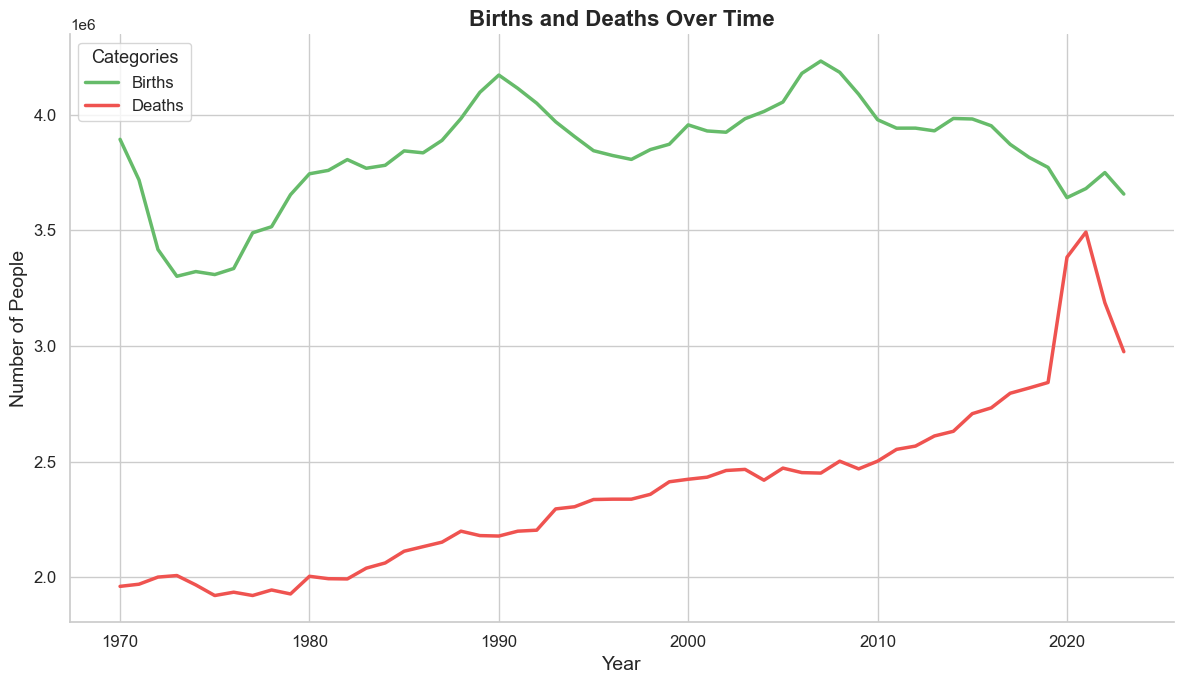

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/elliottserna/Desktop/CDJ/Social_Security/workspace/Elliott/data/births_deaths.xlsx'
sheet_name = 'Analysis'

# Read the data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rescale the 'BIRTHS' and 'DEATHS' columns (values are in thousands)
df['BIRTHS'] = df['BIRTHS'] * 1000
df['DEATHS'] = df['DEATHS'] * 1000

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 7))

# Define colors for births and deaths
births_color = '#66bb6a'  # Green for births
deaths_color = '#ef5350'   # Red for deaths

# Plotting the lines for births and deaths
sns.lineplot(x='YEAR', y='BIRTHS', data=df, color=births_color, label='Births', linewidth=2.5)
sns.lineplot(x='YEAR', y='DEATHS', data=df, color=deaths_color, label='Deaths', linewidth=2.5)

# Add titles and labels
plt.title('Births and Deaths Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Categories', loc='upper left', fontsize=12, title_fontsize='13')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


## Income Distributions

Using S1901 2023 data from the Census ACS 5-Year Estimates 

### Veteran

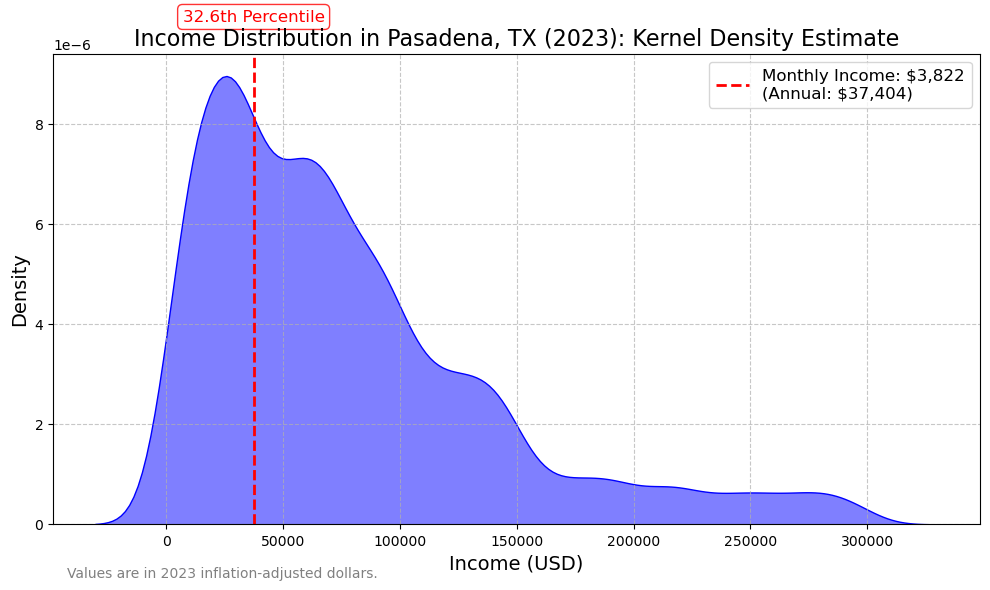

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define income ranges and percentages
income_ranges = [
    (0, 10000),        # Less than $10,000
    (10000, 14999),    # $10,000 to $14,999
    (15000, 24999),    # $15,000 to $24,999
    (25000, 34999),    # $25,000 to $34,999
    (35000, 49999),    # $35,000 to $49,999
    (50000, 74999),    # $50,000 to $74,999
    (75000, 99999),    # $75,000 to $99,999
    (100000, 149999),  # $100,000 to $149,999
    (150000, 199999),  # $150,000 to $199,999
    (200000, 300000)   # $200,000 or more (capped at $300,000)
]
percentages = [6.2, 5.8, 8.0, 11.1, 9.6, 19.2, 13.6, 15.4, 4.7, 6.5]

# Generate synthetic income data
np.random.seed(123)  # For reproducibility
n = 10000  # Number of data points to simulate
income_data = []

for i, (low, high) in enumerate(income_ranges):
    size = int(n * percentages[i] / 100)
    income_data.extend(np.random.uniform(low, high, size))

income_data = np.array(income_data)

# Calculate annual income for $3,117 per month
target_income = 3117 * 12  # Annual income

# Calculate percentile of target income
percentile = np.mean(income_data <= target_income) * 100

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(income_data, fill=True, color="blue", alpha=0.5)
plt.axvline(target_income, color="red", linestyle="--", linewidth=2, label=f"Monthly Income: $3,822\n(Annual: ${target_income:,.0f})")
plt.title("Income Distribution in Pasadena, TX (2023): Kernel Density Estimate", fontsize=16)
plt.xlabel("Income (USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Add text for percentile
plt.text(
    target_income, 0.00001, 
    f"{percentile:.1f}th Percentile", 
    color="red", fontsize=12, ha="center", va="bottom",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

# Add footnote
plt.annotate(
    "Values are in 2023 inflation-adjusted dollars.",
    xy=(0, 0), xycoords='axes fraction',
    fontsize=10, ha='left', va='top', color='gray',
    xytext=(10, -30), textcoords='offset points'
)

# Add legend
plt.legend(fontsize=12, loc="upper right")

plt.tight_layout()
plt.show()


### Consultant

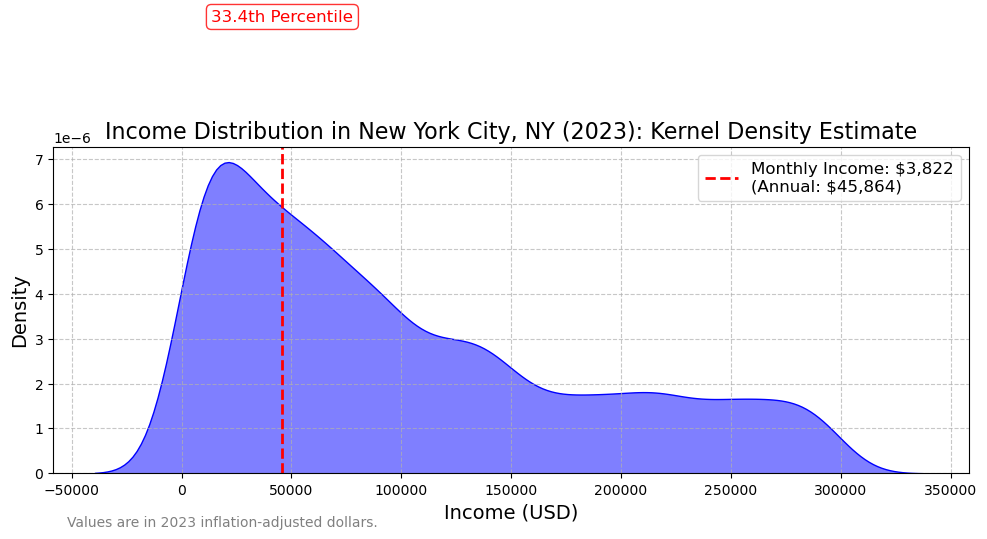

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define income ranges and percentages
income_ranges = [
    (0, 10000),        # Less than $10,000
    (10000, 14999),    # $10,000 to $14,999
    (15000, 24999),    # $15,000 to $24,999
    (25000, 34999),    # $25,000 to $34,999
    (35000, 49999),    # $35,000 to $49,999
    (50000, 74999),    # $50,000 to $74,999
    (75000, 99999),    # $75,000 to $99,999
    (100000, 149999),  # $100,000 to $149,999
    (150000, 199999),  # $150,000 to $199,999
    (200000, 300000)   # $200,000 or more (capped at $300,000)
]
percentages = [8.2, 5.0, 7.1, 6.6, 8.9, 13.4, 10.5, 14.6, 8.9, 16.7]

# Generate synthetic income data
np.random.seed(123)  # For reproducibility
n = 10000  # Number of data points to simulate
income_data = []

for i, (low, high) in enumerate(income_ranges):
    size = int(n * percentages[i] / 100)
    income_data.extend(np.random.uniform(low, high, size))

income_data = np.array(income_data)

# Calculate annual income for $3,822 per month
target_income = 3822 * 12  # Annual income

# Calculate percentile of target income
percentile = np.mean(income_data <= target_income) * 100

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(income_data, fill=True, color="blue", alpha=0.5)
plt.axvline(target_income, color="red", linestyle="--", linewidth=2, label=f"Monthly Income: $3,822\n(Annual: ${target_income:,.0f})")
plt.title("Income Distribution in New York City, NY (2023): Kernel Density Estimate", fontsize=16)
plt.xlabel("Income (USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Add text for percentile
plt.text(
    target_income, 0.00001, 
    f"{percentile:.1f}th Percentile", 
    color="red", fontsize=12, ha="center", va="bottom",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

# Add footnote
plt.annotate(
    "Values are in 2023 inflation-adjusted dollars.",
    xy=(0, 0), xycoords='axes fraction',
    fontsize=10, ha='left', va='top', color='gray',
    xytext=(10, -30), textcoords='offset points'
)

# Add legend
plt.legend(fontsize=12, loc="upper right")

plt.tight_layout()
plt.show()


### Farmer

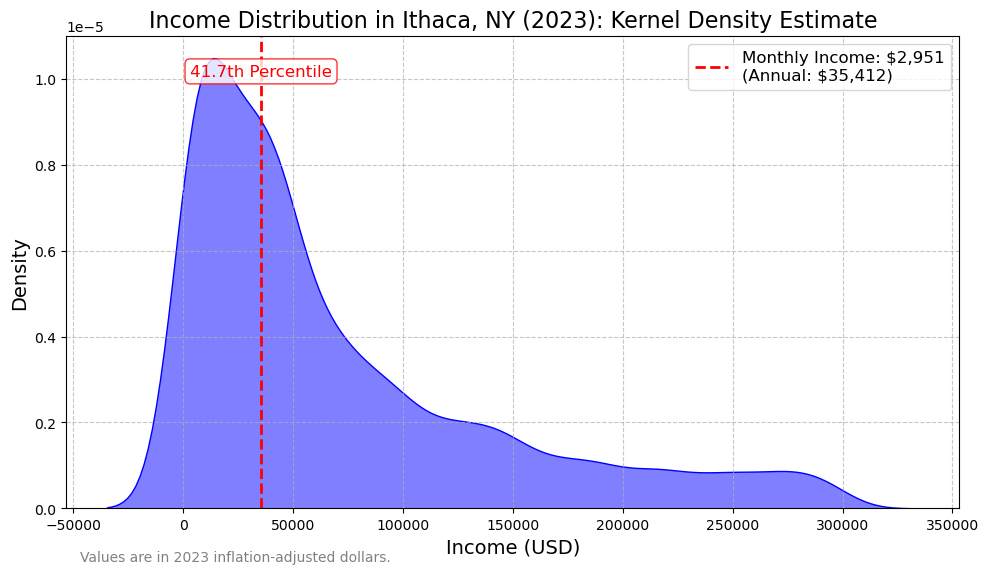

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define income ranges and percentages
income_ranges = [
    (0, 10000),        # Less than $10,000
    (10000, 14999),    # $10,000 to $14,999
    (15000, 24999),    # $15,000 to $24,999
    (25000, 34999),    # $25,000 to $34,999
    (35000, 49999),    # $35,000 to $49,999
    (50000, 74999),    # $50,000 to $74,999
    (75000, 99999),    # $75,000 to $99,999
    (100000, 149999),  # $100,000 to $149,999
    (150000, 199999),  # $150,000 to $199,999
    (200000, 300000)   # $200,000 or more (capped at $300,000)
]
percentages = [18.4, 5.0, 8.7, 9.3, 14.7, 11.0, 8.0, 10.4, 5.9, 8.6]

# Generate synthetic income data
np.random.seed(123)  # For reproducibility
n = 10000  # Number of data points to simulate
income_data = []

for i, (low, high) in enumerate(income_ranges):
    size = int(n * percentages[i] / 100)
    income_data.extend(np.random.uniform(low, high, size))

income_data = np.array(income_data)

# Calculate annual income for $2,951 per month
target_income = 2951 * 12  # Annual income

# Calculate percentile of target income
percentile = np.mean(income_data <= target_income) * 100

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(income_data, fill=True, color="blue", alpha=0.5)
plt.axvline(target_income, color="red", linestyle="--", linewidth=2, label=f"Monthly Income: $2,951\n(Annual: ${target_income:,.0f})")
plt.title("Income Distribution in Ithaca, NY (2023): Kernel Density Estimate", fontsize=16)
plt.xlabel("Income (USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Add text for percentile
plt.text(
    target_income, 0.00001, 
    f"{percentile:.1f}th Percentile", 
    color="red", fontsize=12, ha="center", va="bottom",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

# Add footnote
plt.annotate(
    "Values are in 2023 inflation-adjusted dollars.",
    xy=(0, 0), xycoords='axes fraction',
    fontsize=10, ha='left', va='top', color='gray',
    xytext=(10, -30), textcoords='offset points'
)

# Add legend
plt.legend(fontsize=12, loc="upper right")

plt.tight_layout()
plt.show()


### Function (All)

This is the one used in the figures presented.

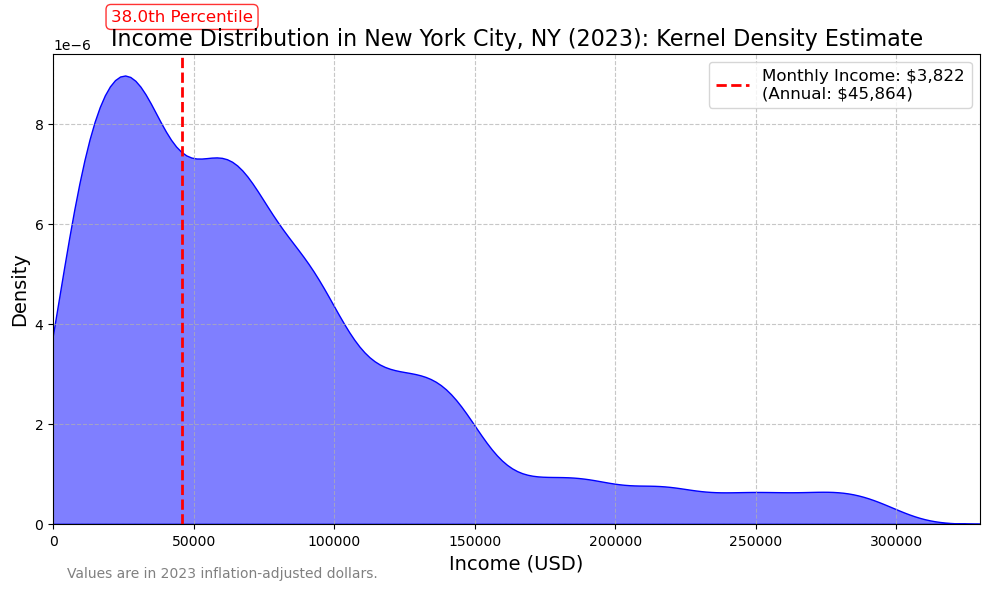

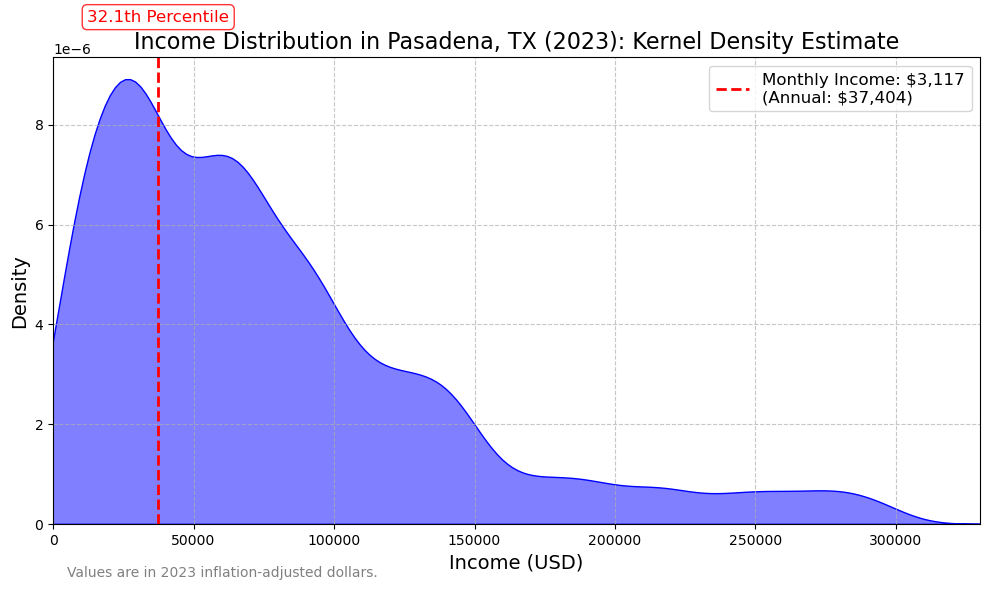

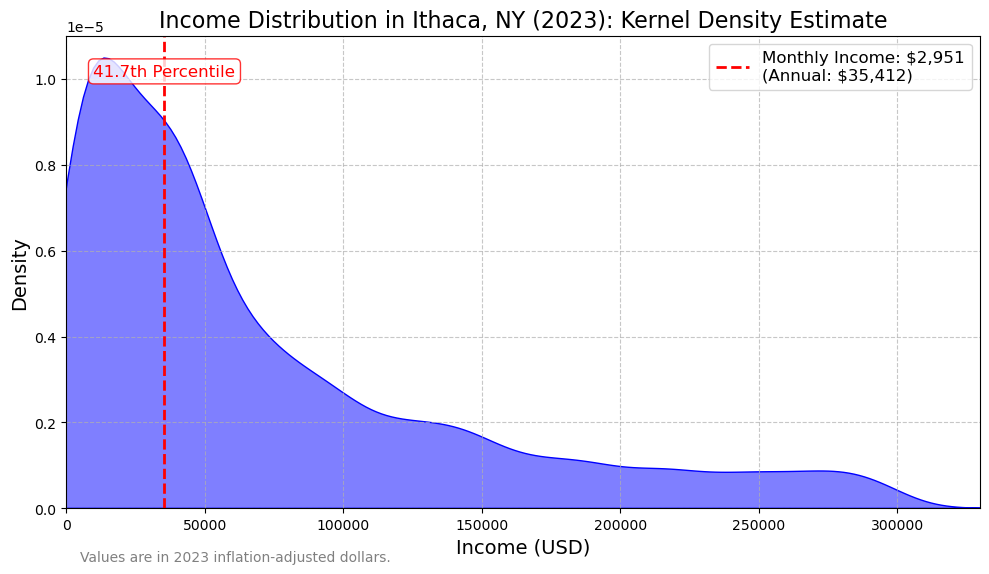

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to generate and plot income distributions
def plot_income_distribution(income_ranges, percentages, target_monthly_income, location):
    # Generate synthetic income data
    np.random.seed(123)  # For reproducibility
    n = 10000  # Number of data points to simulate
    income_data = []

    for i, (low, high) in enumerate(income_ranges):
        size = int(n * percentages[i] / 100)
        income_data.extend(np.random.uniform(low, high, size))

    income_data = np.array(income_data)

    # Calculate annual income for the monthly target income
    target_income = target_monthly_income * 12  # Annual income

    # Calculate percentile of target income
    percentile = np.mean(income_data <= target_income) * 100

    # Plot the KDE
    plt.figure(figsize=(10, 6))
    sns.kdeplot(income_data, fill=True, color="blue", alpha=0.5)
    plt.axvline(target_income, color="red", linestyle="--", linewidth=2, 
                label=f"Monthly Income: ${target_monthly_income:,}\n(Annual: ${target_income:,.0f})")
    plt.title(f"Income Distribution in {location} (2023): Kernel Density Estimate", fontsize=16)
    plt.xlabel("Income (USD)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)

    # Add text for percentile
    plt.text(
        target_income, 0.00001, 
        f"{percentile:.1f}th Percentile", 
        color="red", fontsize=12, ha="center", va="bottom",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
    )

    # Set x-axis limits to start from $0
    plt.xlim(0, max(income_data) * 1.1)

    # Add footnote
    plt.annotate(
        "Values are in 2023 inflation-adjusted dollars.",
        xy=(0, 0), xycoords='axes fraction',
        fontsize=10, ha='left', va='top', color='gray',
        xytext=(10, -30), textcoords='offset points'
    )

    # Add legend
    plt.legend(fontsize=12, loc="upper right")

    plt.tight_layout()
    plt.show()

# Define income ranges and percentages for New York City, Pasadena, and Ithaca
nyc_income_ranges = [
    (0, 10000), (10000, 14999), (15000, 24999), (25000, 34999),
    (35000, 49999), (50000, 74999), (75000, 99999), (100000, 149999),
    (150000, 199999), (200000, 300000)
]
nyc_percentages = [6.2, 5.8, 8.0, 11.1, 9.6, 19.2, 13.6, 15.4, 4.7, 6.5]
nyc_target_monthly_income = 3822  # New York City

pasadena_income_ranges = [
    (0, 10000), (10000, 14999), (15000, 24999), (25000, 34999),
    (35000, 49999), (50000, 74999), (75000, 99999), (100000, 149999),
    (150000, 199999), (200000, 300000)
]
pasadena_percentages = [6.2, 5.0, 8.0, 11.1, 9.6, 19.2, 13.6, 15.4, 4.7, 6.5]
pasadena_target_monthly_income = 2534  # Pasadena

ithaca_income_ranges = [
    (0, 10000), (10000, 14999), (15000, 24999), (25000, 34999),
    (35000, 49999), (50000, 74999), (75000, 99999), (100000, 149999),
    (150000, 199999), (200000, 300000)
]
ithaca_percentages = [18.4, 5.0, 8.7, 9.3, 14.7, 11.0, 8.0, 10.4, 5.9, 8.6]
ithaca_target_monthly_income = 2951  # Ithaca

# Plot income distributions for all three locations
plot_income_distribution(nyc_income_ranges, nyc_percentages, nyc_target_monthly_income, "New York City, NY")
plot_income_distribution(pasadena_income_ranges, pasadena_percentages, pasadena_target_monthly_income, "Pasadena, TX")
plot_income_distribution(ithaca_income_ranges, ithaca_percentages, ithaca_target_monthly_income, "Ithaca, NY")
